In [15]:
import matplotlib.pyplot as plt
import skimage
from skimage import data,io,color,util
from skimage.filters import sobel
from skimage.morphology import watershed

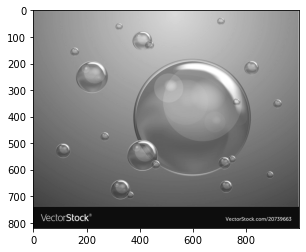

In [4]:
bubbles_img =color.rgb2gray(skimage.io.imread("bubbles.jpg"))
plt.imshow(bubbles_img,cmap='gray')

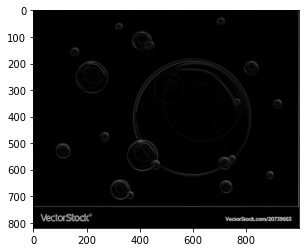

In [8]:
bubbles_edges = sobel(bubbles_img)
plt.imshow(bubbles_edges,cmap='gray')

In [11]:
grid = util.regular_grid(bubbles_img.shape,n_points=300)
grid

(slice(26, None, 52), slice(26, None, 52))

In [12]:
import numpy as np
seeds = np.zeros(bubbles_img.shape,dtype=int)

seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape)+1

c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
<ipython-input-17-90e02d7eb739>:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  water_classic = color.label2rgb(wo, bubbles_img, alpha=0.4,kind='overlay')


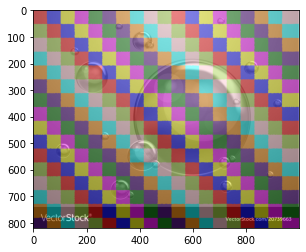

In [17]:
wo= watershed(bubbles_edges,seeds,compactness=0.9)
water_classic = color.label2rgb(wo, bubbles_img, alpha=0.4,kind='overlay')

plt.imshow(water_classic)